## Import packages

In [5]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import scipy.linalg


## Load metadata and paths for .npz files

In [6]:
# load metadata file with image paths and list of pertubations
path_metadata = f'{root}/project/inputs/metadata/index.csv'
df_metadata = pd.read_csv(path_metadata)

# create dictionary that maps the plate wells to their pertubation
map_wellPert = dict(zip(list(df_metadata['Metadata_Well']), list(df_metadata['pert_name'])))


In [11]:
# create list of paths for .npz files in each plate and well
list_npzFiles = []
for well in map_wellPert:
    plate = well.split('_')[0]
    
    path_npzFilesInWell = f'{root}/project/outputs/results/features/{plate}/{well}/*'
    list_npzFilesInWell = glob.glob(path_npzFiles)
    list_npzFiles.extend(list_npzFilesInWell)


## Create cell by feature matrix

In [13]:
# create list of features
matrix_feature = []

# create lists for each attribute of the data
list_plate = []
list_well = []
list_pert = []

# iterate through each .npz file path and load the data
total = 0
for path_npz in list_npzFiles:
    with open(path_npz, "rb") as data:
        info = np.load(data)
        feature = info["features"]
        count = feature.shape[0]
        total = total + count
        matrix_feature.append(feature)

    well = path_feature.split('/')[11]
    list_well_3.extend([well]*count)
    
    plate = well.split('_')[0]
    list_plate_3.extend([plate]*count)
            
    pert = map_wellPert[well]
    list_pert_3.extend([pert]*count)

matrix_feature = np.vstack(matrix_feature)
df_feature = pd.DataFrame(matrix_feature)

df_feature


,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,1.374896,1.946457,1.533587,1.383033,0.858512,3.419737,1.191429,0.460228,0.959819,0.726596,...,1.646513,0.953912,0.520728,1.685396,2.529573,0.497686,2.157415,2.089690,1.474211,1.133581
1,0.653407,2.375012,1.239955,1.451894,0.871987,2.985891,1.356409,0.367445,0.860112,0.785954,...,1.086074,0.373756,0.247532,1.387564,1.540527,0.399302,2.205523,1.782005,0.846840,1.226618
2,1.257962,1.601228,1.707278,1.256628,0.861960,4.282985,1.543684,0.375821,0.937448,0.711828,...,1.772828,1.040630,0.243687,1.413550,3.501398,0.485034,1.978812,2.436448,0.699008,1.327822
3,1.305318,1.704889,2.011545,1.198046,0.916471,3.408127,1.093193,0.266819,1.339557,0.735848,...,1.434868,0.929708,0.108695,1.849878,3.104463,0.564452,2.145429,3.240091,1.595421,1.562988
4,1.244740,2.026476,1.282932,1.383674,0.859466,4.326105,1.489233,0.301547,0.936251,0.738602,...,1.314816,0.877821,0.661824,1.857184,2.163439,0.572185,1.933188,1.602913,0.992758,1.252604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46389,1.206254,2.142472,1.536485,1.402361,0.918801,4.080995,1.294630,0.231088,1.282547,0.836642,...,1.315750,1.007937,0.490738,1.634104,2.305388,0.352998,2.256119,3.083206,1.530682,1.301557
46390,0.852150,2.059618,1.834069,1.444836,0.941583,2.905398,1.240640,0.326100,0.981366,0.662751,...,1.262709,0.468137,0.210751,1.292311,2.256888,0.605074,1.806902,1.404058,1.274867,1.541237
46391,0.921007,2.296440,2.834006,1.293402,0.859203,2.777437,1.814363,0.229502,0.945633,0.732175,...,1.362545,0.736350,0.072255,1.128579,1.914918,0.566937,1.767581,2.662315,1.043675,1.660055
46392,0.741548,2.160136,1.397531,1.800425,0.783983,2.689448,1.349576,0.181593,0.986224,0.740324,...,1.618188,0.650637,0.170242,1.244384,1.980524,0.477097,2.013434,1.783091,0.867804,1.315190


## Plot UMAP of features

In [15]:
reducer = umap.UMAP()
umap_feature = reducer.fit_transform(df_feature.values)
umap_feature.shape


(46394, 2)

In [16]:
df_umap = pd.DataFrame(data = umap_feature, columns = ['x', 'y'])

# can add other attributes for coloring the umap plot
# df_umap['pert_name'] = list_pert
# df_umap['plate'] = list_plate
# df_umap['well'] = list_well

# create list to identify control and non-control cells
# assign 1 to cells from control condition and 0 for all other conditions/perturbations
map_pertControl = dict(zip(list(set(list_pert)), [1 if x == 'control' else 0 for x in list(set(list_pert))]))
list_control = np.array([map_pertControl[x] for x in list_pert])
df_umap['control'] = list_control

df_umap


,x,y,control
0,-0.254624,1.096094,0
1,-2.152467,3.908985,0
2,0.347384,1.716245,0
3,0.482233,0.640410,0
4,-0.654828,1.956559,0
...,...,...,...
46389,1.227452,-0.517042,0
46390,-1.397479,4.775330,0
46391,0.286709,6.735929,0
46392,-1.838380,5.296611,0


[Text(0.5, 0, 'umap_1'), Text(0, 0.5, 'umap_2')]

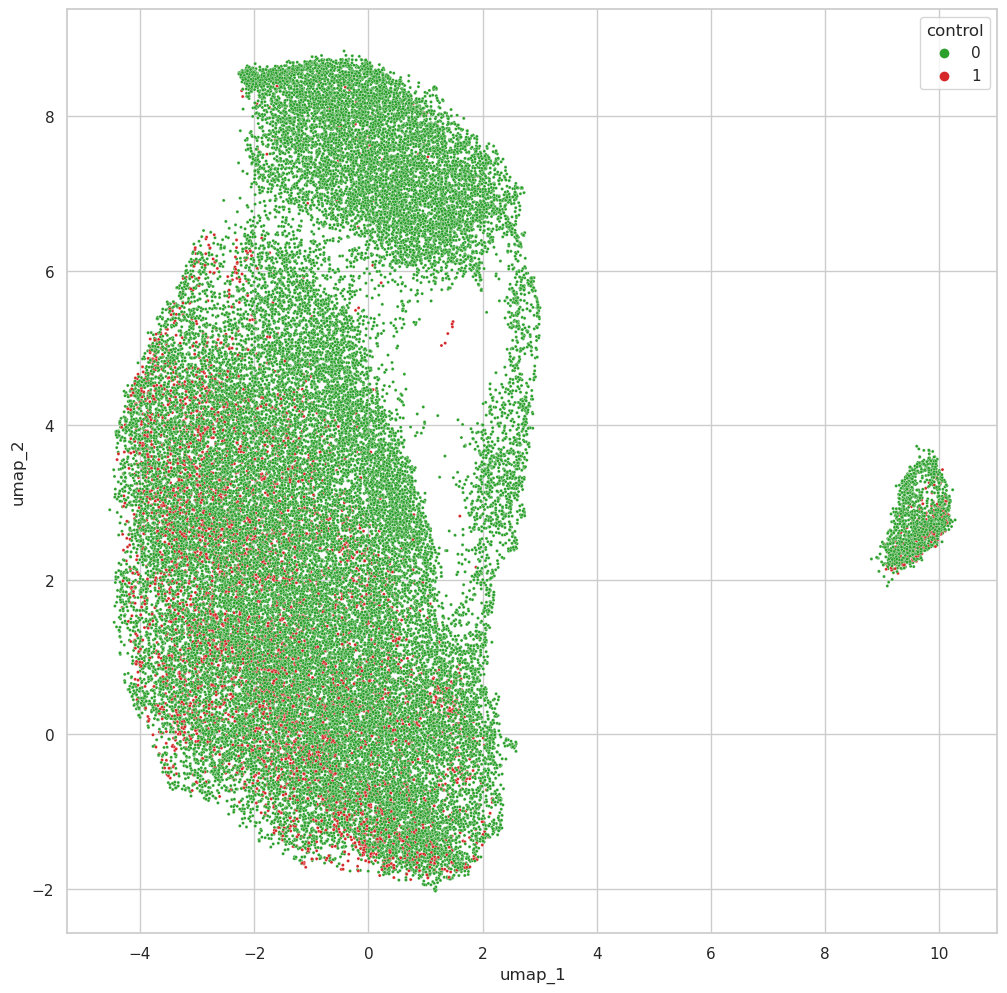

In [17]:
sns.set(rc={'figure.figsize':(12,12)}, style='whitegrid')
color_palette = sns.color_palette("tab10")
color_control = {0: color_palette[2], 1: color_palette[3]}

ax = sns.scatterplot(x="x", 
                     y="y", 
                     data=df_umap_3, 
                     hue="control", 
                     s=5,
                     palette=color_control
                    )

ax.set(xlabel='umap_1', 
       ylabel='umap_2'
      )
